In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import string
from matplotlib.ticker import FuncFormatter

#display more rows
pd.options.display.max_rows = 999

%matplotlib inline

### Data Cleaning and Joining financial and lego data

In [4]:
# Read in financial and lego data
fin = pd.read_csv('lego_fin.csv')
df = pd.read_csv('lego_out.csv')
df.year = df.year.fillna(0).astype(int)

# Create new columns measuring yearly changes in revenue and change in operating_profit
# Define a function to iterate over rows of dataframe in order to calculate annual change
def year_over_year(df, col):
    change = []
    years = df.year
    for i in range(df.shape[0]-1):
        change.append((df[col][i] / df[col][i+1]) - 1)
    change.append(0)
    return pd.DataFrame(list(zip(years, change)), columns=['year', col+"_growth"])

#sort fin dataframe in ascending years
fin = fin.sort_values(by=['year'], ascending=True)

# Create 2 new columns to measure growth rate of revenue, profitability and expenses
fin['profit_growth'] = year_over_year(fin, 'operating_profit')["operating_profit_growth"]
fin['revenue_growth'] = year_over_year(fin, 'revenue')["revenue_growth"]

### How does revenue growth rate affect profit growth rate?

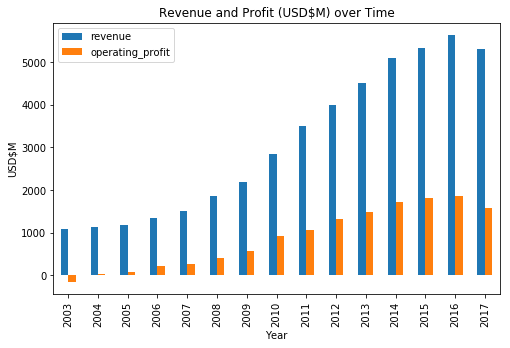

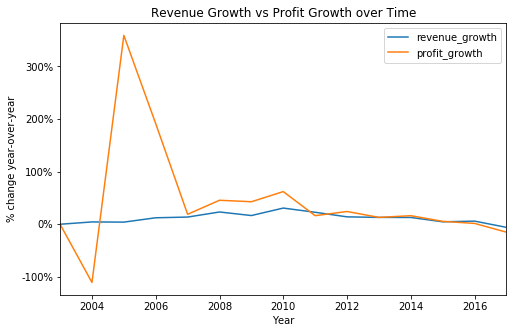

In [8]:
# How has revenue and operating margin changed over time?

fin.plot(x="year", y=["revenue", "operating_profit"], kind="bar", figsize=(8,5))
plt.title("Revenue and Profit (USD$M) over Time")
plt.xlabel("Year")
plt.ylabel("USD$M")


# How does revenue growth rate affect profit growth rate?

ax1 = fin.plot(x="year", y=['revenue_growth', 'profit_growth'], kind="line", figsize=(8,5))
plt.title("Revenue Growth vs Profit Growth over Time")
plt.xlabel("Year")
plt.ylabel("% change year-over-year")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.savefig('revenue_growth.png') 

### Did expenses management contribute to increasing profit margins?

Text(0,0.5,'USD$Millions')

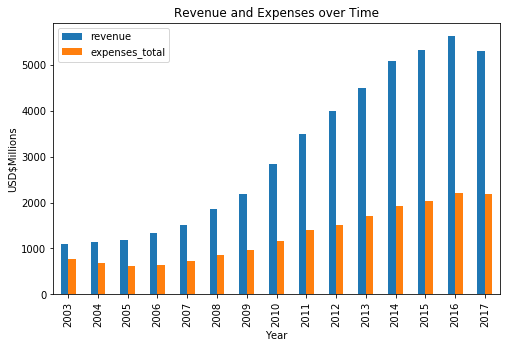

In [12]:
ax2 = fin.plot(x="year", y=['revenue', 'expenses_total'], kind="bar", figsize=(8,5))
plt.title("Revenue and Expenses over Time")
plt.xlabel("Year")
plt.ylabel("USD$Millions")

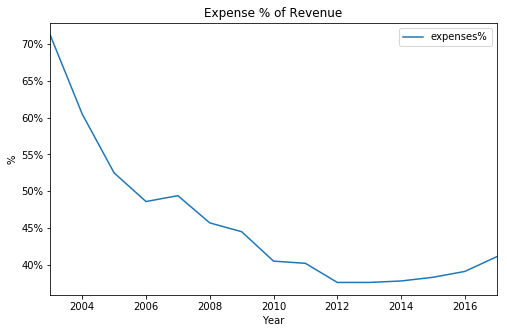

In [11]:
# Plotting expense as % of revenue over time to measure operational efficiency

ax3 = fin.plot(x="year", y='expenses%', kind="line", figsize=(8,5))
plt.title("Expense % of Revenue")
plt.xlabel("Year")
plt.ylabel("%")
ax3.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### Comparing number of sets and expenses per year

Text(0,0.5,'Units of Sets, USD$100K')

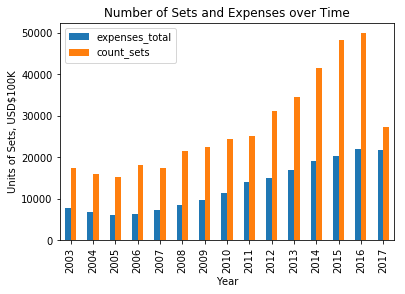

In [7]:
# Join the financial and lego sets count (from lego data) together on 'year'
set_count = df[df.year > 2002].groupby('year')['set_name'].count()
y1 = []
for year in set_count.index.values:
    y1.append(year)
    
set_count_df = pd.DataFrame(list(zip(y1, set_count)), columns=['year', 'count_sets'])

expense_graph = pd.merge(set_count_df, fin, left_on = 'year', right_on = 'year', how = 'left')
# Scale the expenses up by 10 for ease of plotting, to become $100K units
expense_graph['expenses_total'] = expense_graph['expenses_total']*10

expense_graph.plot(x='year', y=['expenses_total', 'count_sets'], kind='bar')
plt.title("Number of Sets and Expenses over Time")
plt.xlabel("Year")
plt.ylabel("Units of Sets, USD$100K")

In [6]:
# Examining whether sales reported includes movie revenue

fin.revenue.sum() / df[df.year > 2002].quantity.sum() * 1000000

#Sales includes movie revenue is average revenue per set made is $33K.

33864.07320087779

### Which Lego theme is best-selling of all time?

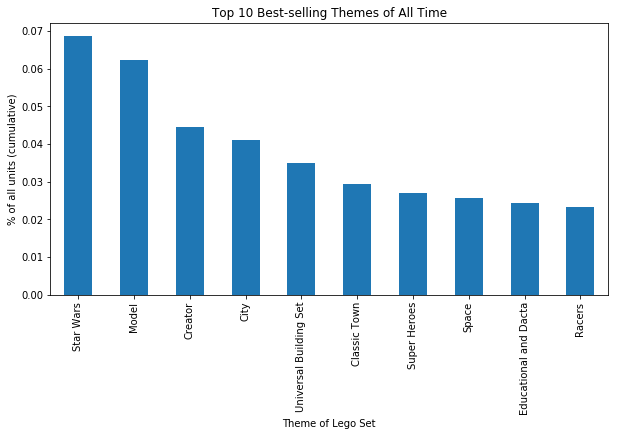

In [9]:
goat = df.groupby('parent_name')['quantity'].sum().sort_values(ascending=False).head(10)
themes = list(goat.index)[:10]
quantity_sold = df.quantity.sum()

cum_quantity = pd.DataFrame(list(zip(themes, goat/quantity_sold)), columns=['theme', 'percent_qty'])
cum_quantity.plot(x='theme', y='percent_qty', kind='bar', legend=False, figsize=(10,5))
plt.title("Top 10 Best-selling Themes of All Time")
plt.xlabel("Theme of Lego Set")
plt.ylabel("% of all units (cumulative)")
plt.savefig('top10.png')

Star Wars is the best-selling theme of all time, with 132,552 units made and taking up 7% of all units ever made by Lego.
Even though it is a recent arrival since 2009, it has overtaken themes such as Model (since 1983) and Creator (since 2001).


### Which themes are bestsellers for each year?

In [27]:
def topset(df):
    """This function takes a dataframe that contains a variable named quantity.
    It outputs a Series containing the top theme by sum of quantity."""
    
    return df.groupby('parent_name')['quantity'].sum().sort_values(ascending=False).head(1)
    
topannual = df.groupby('year')
bestsellers = topannual.apply(topset)
bs = pd.DataFrame(bestsellers)

a1 = bestsellers.index.values
best_year = []
best_theme = []
for year, theme in a1:
    best_year.append(int(year))
    best_theme.append(theme)

    
bestsellers_df = pd.DataFrame(list(zip(best_year, best_theme, bs.quantity)), columns=['year', 'theme', 'quantity'])
bestsellers_df

,year,theme,quantity
0,1950,Classic,71
1,1953,Classic,66
2,1954,Classic,173
3,1955,Classic,1038
4,1956,Classic,222
5,1957,Classic,895
6,1958,Classic,1872
7,1959,Classic,65
8,1960,Educational and Dacta,476
9,1961,Classic,1028


### Create Wordcloud of bestselling themes to see which dominated the charts the most

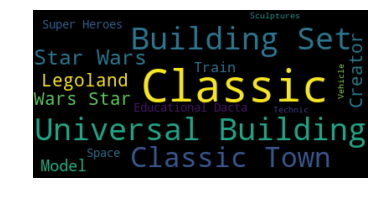

In [29]:
from wordcloud import WordCloud

# Create a text file with names of bestselling themes
bestsellers_cloud = pd.DataFrame(list(best_theme))
bestsellers_cloud.to_csv('bestsellers.txt', header=None, index=None, sep=' ', mode='a')
text = open('bestsellers.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.show()